In [1]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

conn = duckdb.connect()

conn.query("""
               INSTALL httpfs;
               LOAD httpfs;
                CREATE SECRET secretaws (
                TYPE S3, 
                URL_STYLE 'path',
                ENDPOINT 'localhost:9000',
                KEY_ID 'minioRootUser',
                SECRET 'iLoveCoding1234',
                REGION 'us-east-1',
                USE_SSL FALSE
            );
               """)

df = conn.query("""
                SELECT wiki, count(wiki)
                FROM read_parquet('s3://wikichanges/topics/wikimedia.recentchange/partition=0/wikimedia.recentchange*.parquet')
                GROUP BY wiki
                ORDER BY count(wiki) DESC
                ;
                """)

df.show()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────────┬─────────────┐
│     wiki     │ count(wiki) │
│   varchar    │    int64    │
├──────────────┼─────────────┤
│ commonswiki  │        2523 │
│ wikidatawiki │         827 │
│ enwiki       │         729 │
│ ruwiki       │         194 │
│ ruwikiquote  │         173 │
│ enwiktionary │         117 │
│ frwiki       │         105 │
│ plwiki       │          99 │
│ ptwiki       │          59 │
│ mgwiktionary │          56 │
│   ·          │           · │
│   ·          │           · │
│   ·          │           · │
│ hawiki       │           1 │
│ frwikibooks  │           1 │
│ dawiki       │           1 │
│ dewikivoyage │           1 │
│ gawiki       │           1 │
│ etwiki       │           1 │
│ cswiki       │           1 │
│ anpwiki      │           1 │
│ lawiki       │           1 │
│ hrwiki       │           1 │
├──────────────┴─────────────┤
│     76 rows (20 shown)     │
└────────────────────────────┘



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

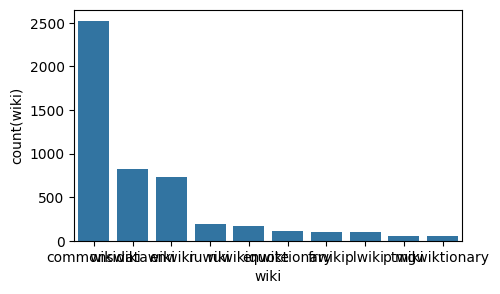

In [11]:
f, ax = plt.subplots(1, 1, figsize=(5, 3))
ax = sns.barplot(x='wiki', y='count(wiki)', data=conn.sql("select * from df limit 10").df())

plt.show()